In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
root = '/home/heye0507/sz_audio'
audio_data = root + '/audio_data'
data = root + '/data'

In [33]:
df_train = pd.read_csv(data+'/train.csv')
df_valid = pd.read_csv(data+'/valid_test.csv')

In [4]:
df_train.head()

,filename,orig_filename,id,name,eng_name,gender,cul,hometown,age,height,weight,temp,bpm,tsh,t4,t3
0,train_0043.wav,524215/Ausculation_Report_Eko_Recording_140111...,524215,叶思思,"Ye, Sisi",1=男,1=汉族,温州,35,164.0,64.0,36.5,80.0,1.12,8.32,4.6
1,train_0209.wav,524215/Ausculation_Report_Eko_Recording_140114...,524215,叶思思,"Ye, Sisi",1=男,1=汉族,温州,35,164.0,64.0,36.5,80.0,1.12,8.32,4.6
2,train_0200.wav,524215/Ausculation_Report_Eko_Recording_140112...,524215,叶思思,"Ye, Sisi",1=男,1=汉族,温州,35,164.0,64.0,36.5,80.0,1.12,8.32,4.6
3,train_0201.wav,524215/Ausculation_Report_Eko_Recording_140113...,524215,叶思思,"Ye, Sisi",1=男,1=汉族,温州,35,164.0,64.0,36.5,80.0,1.12,8.32,4.6
4,train_0159.wav,615897/Ausculation_Report_Eko_Recording_141773...,615897,叶晓霞,"Ye,Xiaoxia",2=女,1=汉族,永嘉,69,156.0,50.0,36.9,60.0,2.53,12.34,4.2


In [17]:
s_tsh, s_t3, s_t4 = 1.5, 4.5, 11

In [6]:
df_train['tsh_label'] = df_train['tsh'].apply(lambda o: 1 if o < s_tsh else 0)

In [7]:
df_train['tsh_label'].value_counts() # less than s_tsh confirm

1    236
0    158
Name: tsh_label, dtype: int64

<AxesSubplot:>

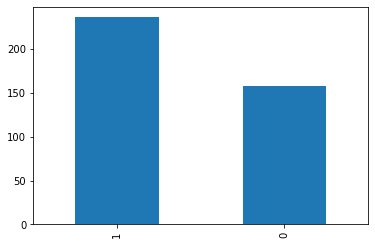

In [9]:
df_train['tsh_label'].value_counts().plot(kind='bar')

In [18]:
df_train['t3_label'] = df_train['t3'].apply(lambda o: 0 if o < s_t3 else 1) # greater than s_t3 confirm
df_train['t4_label'] = df_train['t4'].apply(lambda o: 0 if o < s_t4 else 1) # greater than s_t4 confirm

In [19]:
df_train['t3_label'].value_counts()

0    199
1    195
Name: t3_label, dtype: int64

In [16]:
df_train['t4_label'].value_counts()

0    204
1    190
Name: t4_label, dtype: int64

In [27]:
df_valid = df_valid[df_valid['valid']==True]

In [38]:
df_valid['tsh_label'] = df_valid['tsh'].apply(lambda o: 1 if o < s_tsh else 0)
df_valid['t3_label'] = df_valid['t3'].apply(lambda o: 0 if o < s_t3 else 1)
df_valid['t4_label'] = df_valid['t4'].apply(lambda o: 0 if o < s_t4 else 1)

In [22]:
train_mix = pd.concat([df_train,df_valid])

In [37]:
train_mix.tail()

,filename,orig_filename,id,name,eng_name,gender,cul,hometown,age,height,weight,temp,bpm,tsh,t4,t3,tsh_label,t3_label,t4_label,valid
275,devel_0018.wav,1432449/S Ausculation_Report_Eko_Recording_141...,1432449,周洪兵,"Zhou, Hongbing",1=男,1=汉族,温州,52,170.0,80.0,72.0,36.7,0.63,4.5,9.59,1,1,0,True
276,devel_0067.wav,1432449/Ausculation_Report_Eko_Recording_14103...,1432449,周洪兵,"Zhou, Hongbing",1=男,1=汉族,温州,52,170.0,80.0,72.0,36.7,0.63,4.5,9.59,1,1,0,True
277,devel_0066.wav,1432449/S Ausculation_Report_Eko_Recording_141...,1432449,周洪兵,"Zhou, Hongbing",1=男,1=汉族,温州,52,170.0,80.0,72.0,36.7,0.63,4.5,9.59,1,1,0,True
278,devel_0068.wav,1432449/Ausculation_Report_Eko_Recording_14103...,1432449,周洪兵,"Zhou, Hongbing",1=男,1=汉族,温州,52,170.0,80.0,72.0,36.7,0.63,4.5,9.59,1,1,0,True
279,devel_0037.wav,1432449/Ausculation_Report_Eko_Recording_14103...,1432449,周洪兵,"Zhou, Hongbing",1=男,1=汉族,温州,52,170.0,80.0,72.0,36.7,0.63,4.5,9.59,1,1,0,True


In [34]:
df_valid = df_valid[df_valid['valid']==False]

In [39]:
df_valid.shape

(131, 20)

In [41]:
df_valid['tsh_label'].value_counts()

1    67
0    64
Name: tsh_label, dtype: int64

In [42]:
train_mix.to_csv(data+'/train_valid_mix.csv',index=False)
df_valid.to_csv(data+'/new_test.csv',index=False)

In [32]:
df_valid['tsh_label'].value_counts()

0    145
1      4
Name: tsh_label, dtype: int64

In [33]:
df_valid['t3_label'].value_counts()

0    126
1     23
Name: t3_label, dtype: int64

In [34]:
df_valid['t4_label'].value_counts()

0    141
1      8
Name: t4_label, dtype: int64

In [21]:
264 / (264+130)

0.6700507614213198

In [22]:
83 / (83+66)

0.5570469798657718

In [23]:
386 / (386+6)

0.9846938775510204

In [24]:
127 / (127+22)

0.8523489932885906

# 0.27, 6.8, 22